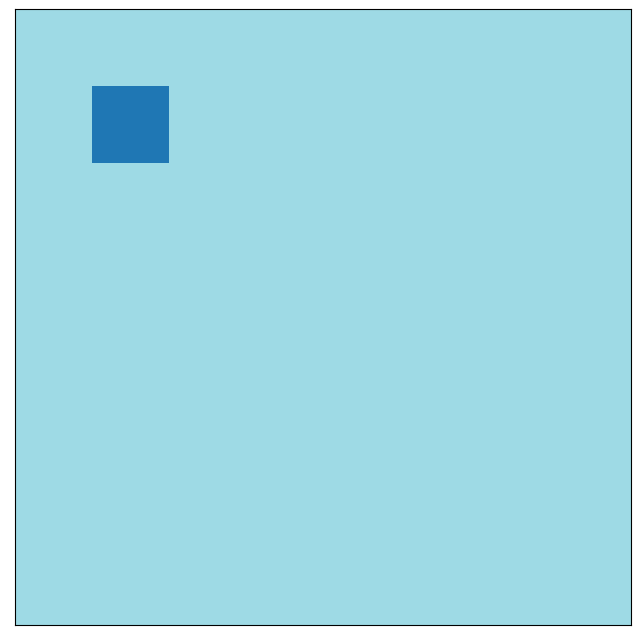

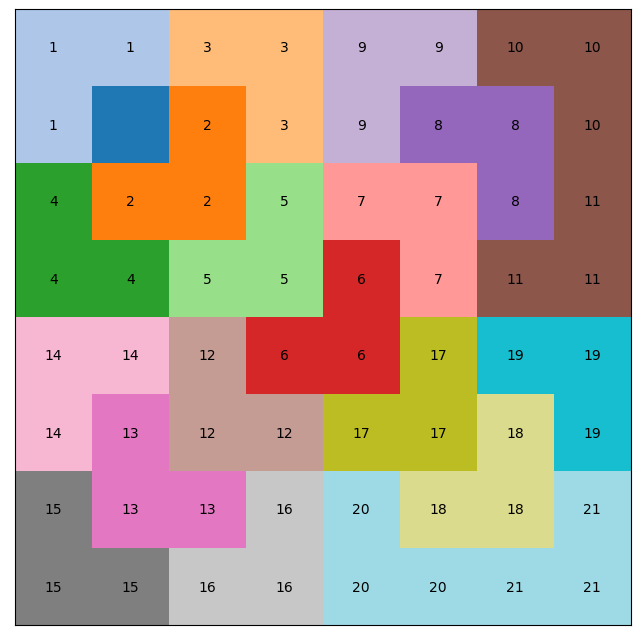

In [10]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np

def carreler_echiquier(n, def_x, def_y, x=0, y=0, echiquier=None, marque=1, num_l=None): 
  
    if echiquier is None:
        echiquier = np.zeros((n, n), dtype=int)
        echiquier[def_x][def_y] = -1  
    
    if num_l is None:
        num_l = np.full((n, n), '', dtype=object)  
    
   
    if n == 2:
        for i in range(2):
            for j in range(2):
                if not (x + i == def_x and y + j == def_y):  
                    echiquier[x + i][y + j] = marque
                    num_l[x + i][y + j] = f"{marque}"  
        return marque + 1  

  
    mi = x + n // 2
    mj = y + n // 2
    
   
    if def_x < mi and def_y < mj:
        # La case défectueuse est dans le 1er sous-échéquier
        marque = carreler_echiquier(n // 2, def_x, def_y, x, y, echiquier, marque, num_l)
        # Placer un L artificiel
        echiquier[mi][mj - 1] = echiquier[mi - 1][mj] = echiquier[mi][mj] = marque
        num_l[mi][mj - 1] = num_l[mi - 1][mj] = num_l[mi][mj] = f"{marque}"
        marque += 1
      
        marque = carreler_echiquier(n // 2, mi - 1, mj, x, mj, echiquier, marque, num_l)  
        marque = carreler_echiquier(n // 2, mi, mj - 1, mi, y, echiquier, marque, num_l)  
        marque = carreler_echiquier(n // 2, mi, mj, mi, mj, echiquier, marque, num_l)     
    
    elif def_x < mi and def_y >= mj:
       
        marque = carreler_echiquier(n // 2, def_x, def_y, x, mj, echiquier, marque, num_l)
        echiquier[mi - 1][mj - 1] = echiquier[mi][mj] = echiquier[mi][mj - 1] = marque
        num_l[mi - 1][mj - 1] = num_l[mi][mj] = num_l[mi][mj - 1] = f"{marque}"
        marque += 1
        marque = carreler_echiquier(n // 2, mi - 1, mj - 1, x, y, echiquier, marque, num_l)  
        marque = carreler_echiquier(n // 2, mi, mj - 1, mi, y, echiquier, marque, num_l)
        marque = carreler_echiquier(n // 2, mi, mj, mi, mj, echiquier, marque, num_l)         
    
    elif def_x >= mi and def_y < mj:
       
        marque = carreler_echiquier(n // 2, def_x, def_y, mi, y, echiquier, marque, num_l)
        echiquier[mi - 1][mj - 1] = echiquier[mi - 1][mj] = echiquier[mi][mj] = marque
        num_l[mi - 1][mj - 1] = num_l[mi - 1][mj] = num_l[mi][mj] = f"{marque}"
        marque += 1
        marque = carreler_echiquier(n // 2, mi - 1, mj - 1, x, y, echiquier, marque, num_l)  
        marque = carreler_echiquier(n // 2, mi - 1, mj, x, mj, echiquier, marque, num_l)      
        marque = carreler_echiquier(n // 2, mi, mj, mi, mj, echiquier, marque, num_l)         
    
    else:
      
        marque = carreler_echiquier(n // 2, def_x, def_y, mi, mj, echiquier, marque, num_l)
        echiquier[mi - 1][mj - 1] = echiquier[mi - 1][mj] = echiquier[mi][mj - 1] = marque
        num_l[mi - 1][mj - 1] = num_l[mi - 1][mj] = num_l[mi][mj - 1] = f"{marque}"
        marque += 1
        marque = carreler_echiquier(n // 2, mi - 1, mj - 1, x, y, echiquier, marque, num_l)  # 1er quadrant
        marque = carreler_echiquier(n // 2, mi - 1, mj, x, mj, echiquier, marque, num_l)      # 2e quadrant
        marque = carreler_echiquier(n // 2, mi, mj - 1, mi, y, echiquier, marque, num_l)      # 3e quadrant

    return marque

def afficher_echiquier(echiquier, num_l, title="Échiquier"):
    plt.figure(figsize=(8, 8))
    plt.imshow(echiquier, cmap="tab20", interpolation="nearest")
    
    #numérotation des cases 
    for i in range(len(echiquier)):
        for j in range(len(echiquier[i])):
            if num_l[i][j] != '':
                plt.text(j, i, num_l[i][j], ha='center', va='center', color='black', fontsize=10)
                

  
    plt.xticks([])  # Supprime les ticks sur l'axe X
    plt.yticks([])  # Supprime les ticks sur l'axe Y
    plt.show()


n = 8
def_x, def_y = 1, 1  
echiquier_initial = np.zeros((n, n), dtype=int)
num_l_initial = np.full((n, n), '', dtype=object)  

echiquier_initial[def_x][def_y] = -1  

# l'échiquier avant carrelage
afficher_echiquier(echiquier_initial, num_l_initial, title="Échiquier avant carrelage")


carreler_echiquier(n, def_x, def_y, echiquier=echiquier_initial, num_l=num_l_initial)

#  après carrelage
afficher_echiquier(echiquier_initial, num_l_initial, title="Échiquier avec numéros")
